<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/v%C3%AD_d%E1%BB%A5_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
wind = ctrl.Antecedent(np.arange(0.7,3.1,0.1),'wind')
temperature = ctrl.Antecedent(np.arange(20.4,39.6,0.1),'temperature')
rainfall = ctrl.Consequent(np.arange(0.2,9.2,0.1),'rainfall')
wind['very low']=fuzz.trimf(wind.universe,[0.7,1.1,1.5])
wind['low']=fuzz.trimf(wind.universe,[1.2,1.5,1.9])
wind['normal']=fuzz.trimf(wind.universe,[1.7,1.9,2.3])
wind['high']=fuzz.trimf(wind.universe,[2.2,2.5,2.7])
wind['very high']=fuzz.trimf(wind.universe,[2.5,2.9,3.2])
temperature['very low']=fuzz.trimf(temperature.universe,[20.4,23.2,26.24])
temperature['low']=fuzz.trimf(temperature.universe,[24.24,26.3,30.08])
temperature['normal']=fuzz.trimf(temperature.universe,[28.08,30.1,32.92])
temperature['high']=fuzz.trimf(temperature.universe,[30.92,33.84,36.68])
temperature['very high']=fuzz.trimf(temperature.universe,[34.68,37.52,39.6])
rainfall['very low']=fuzz.trimf(rainfall.universe,[0.2,1.1,2])
rainfall['low']=fuzz.trimf(rainfall.universe,[1.2,2.9,3.8])
rainfall['normal']=fuzz.trimf(rainfall.universe,[3,4.7,5.6])
rainfall['high']=fuzz.trimf(rainfall.universe,[5,6.5,7.4])
rainfall['very high']=fuzz.trimf(rainfall.universe,[7,8.3,9.2])


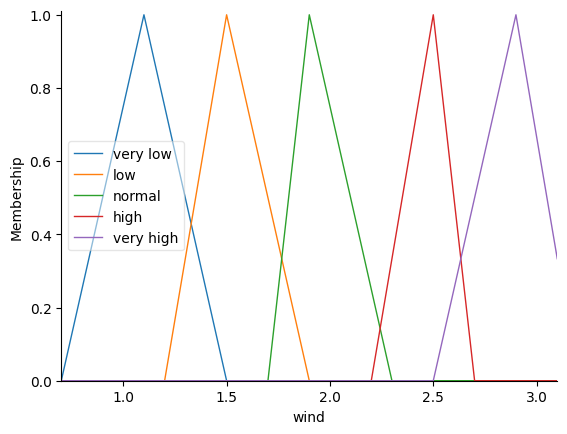

In [3]:
wind.view()

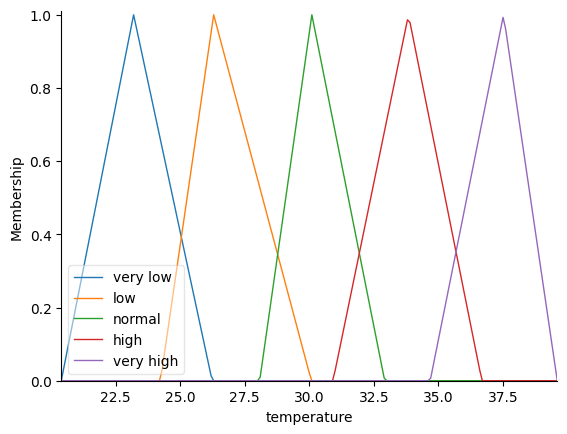

In [4]:
temperature.view()

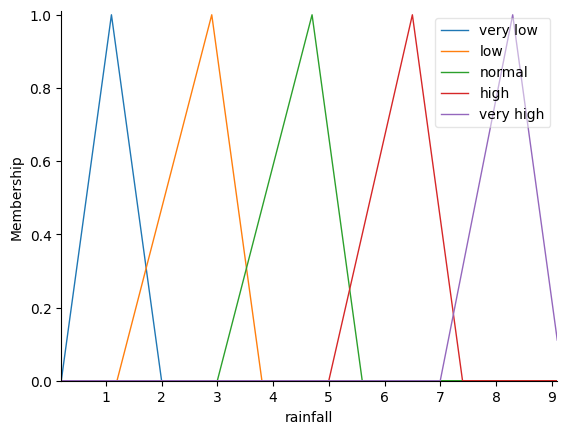

In [5]:
rainfall.view()

In [6]:
rule1=ctrl.Rule(wind['very low']&temperature['very high'],rainfall['high'])
rule2=ctrl.Rule(wind['low']&temperature['very high'],rainfall['very high'])
rule3=ctrl.Rule(wind['normal']&temperature['high'],rainfall['high'])
rule4=ctrl.Rule(wind['high']&temperature['high'],rainfall['high'])
rule5=ctrl.Rule(wind['very high']&temperature['high'],rainfall['high'])
rule6=ctrl.Rule(wind['very high']&temperature['very high'],rainfall['very high'])

6.287146604488488


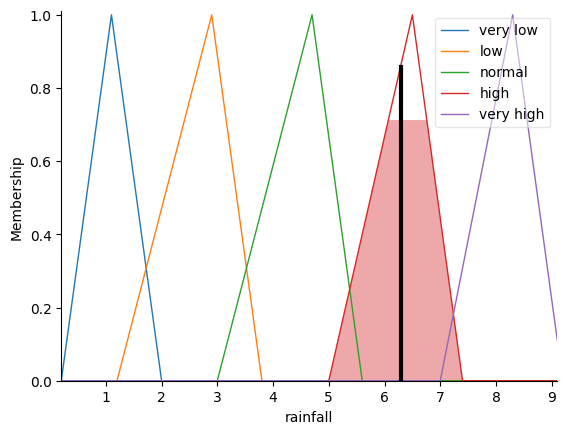

In [11]:
rainfalling_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['wind'] = 2.5
rainfalling.input['temperature'] = 33
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(rainfalling)